In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3
from sqlite3 import Error

In [3]:
#get portion of data
def df_sample(dataframe, num_rows):
    if not dataframe.head().empty:
        return dataframe.sample(num_rows)
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#get information
def df_info(dataframe):
    if not dataframe.empty:
        return dataframe.info() 
    else:
        return "There is an issue with your dataframe! Check your dataframe variable."

#get shape
def df_shape(dataframe):
    if dataframe.shape == (0,0):
        return "Your dataframe does not exist! Check your dataframe variable."
    else:
        return dataframe.shape

#decribe dataframe
def describe_df(dataframe, categorical=False):
    if not dataframe.empty:
        if categorical == False:
            return dataframe.describe()
        else:
            return dataframe.describe(include='O')
    else:
        return "Your dataframe does not exist! Check your dataframe variable."


#get columns
def get_columns(dataframe):
    list_length = len(dataframe.columns)
    if list_length >= 0:
        return dataframe.columns
    else:
        return "There are no columns in your dataframe! Check your dataframe variable."

#get column data
def column_data(dataframe, column_name: str):
    if column_name in get_columns(dataframe):
        return dataframe[column_name]
    else:
        return "Your dataframe or column does not exist! Check your dataframe variable and columns."

#check nulls
def check_nulls(dataframe):
    num_nulls = dataframe.isnull().sum()
    percent_nulls = (num_nulls / len(dataframe) * 100).round(2)
    if not dataframe.empty:
        if num_nulls.sum() > 0:
            print(f"Here are the number of nulls per column: \n{num_nulls}")
            print(f"Here are the percent of nulls per column: \n{percent_nulls}")
        else:
            return "There are no nulls in your data."
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#check value counts
def unique(dataframe):
    if not dataframe.empty:
        return f"Here are the number of unique values per columns:", dataframe.nunique()


#check for dups
def check_dups(dataframe):
    num_dups = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {num_dups} duplicates in your dataframe"
    else:
        return "Your dataframe does not exist! Check your dataframe variable."
    
#drop dups
def drop_dups(dataframe):
    dups = check_dups(dataframe)
    if dups == 0:
        return dataframe
    else:
        return dataframe.drop_duplicates()


#Visuals 

#make boxplots
def make_boxplot(dataframe, column):
    if not dataframe.empty:
        box = plt.boxplot(dataframe[column])
        plt.title(column)
        plt.show()
    

#make boxplots
def make_hist(dataframe, column):
    if not dataframe.empty:
        hist = plt.hist(dataframe[column])
        plt.title(column)
        plt.show()

#make pairplot
def make_pairplot(dataframe):
    return sns.pairplot(dataframe)

#make heatmap
def make_heatmap(dataframe, fig_size):
    fig = plt.figure(figsize=fig_size)
    correlation = dataframe.corr(numeric_only=True)
    sns.heatmap(correlation, cmap='coolwarm', annot=True)
    return plt.show()

#make scatter plot
def make_scatter(dataframe, x_column, y_column, title: str, x_label: str, y_label: str):
    plt.scatter(x=dataframe[x_column], y=dataframe[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

# Load Data

In [4]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [5]:
#create connection to db
connection = create_connection('kickstarter.sqlite')


Connection to SQLite DB successful


In [6]:
#query db for data
my_query = """SELECT Campaign_ID, Launch_Date, End_Date, Goal, Pledged, Num_Donors, Status, Category, Subcategory, Project_Country
            FROM Campaigns 
            INNER JOIN Categories ON Campaigns.Category_ID=Categories.Category_ID
            INNER JOIN Subcategories ON Campaigns.Subcategory_ID=Subcategories.Subcategory_ID
            INNER JOIN Countries ON Campaigns.Country_ID=Countries.Country_ID"""

#store query results in df
data = pd.read_sql_query(my_query, connection)

data.head()

,Campaign_ID,Launch_Date,End_Date,Goal,Pledged,Num_Donors,Status,Category,Subcategory,Project_Country
0,1,2016-08-11 00:00:00,2016-10-10 00:00:00,100000000,0,0,Failed,Film & Video,Science Fiction,United States of America
1,2,2019-12-19 00:00:00,2020-02-14 00:00:00,100000000,85,4,Failed,Film & Video,Fantasy,United States of America
2,3,2017-03-01 00:00:00,2017-03-22 00:00:00,5219374,1,1,Failed,Technology,Software,Mexico
3,4,2018-06-04 00:00:00,2018-07-05 00:00:00,100000000,1,1,Failed,Publishing,Publishing,United States of America
4,5,2015-05-01 00:00:00,2015-06-30 00:00:00,80610122,0,0,Failed,Art,Illustration,Canada


# EDA

In [28]:
#check for dups
check_dups(data)

'There are 0 duplicates in your dataframe'

In [29]:
#check for nulls
check_nulls(data)

'There are no nulls in your data.'

In [30]:
#View sample and see format
df_sample(data, 5)

,Campaign_ID,Launch_Date,End_Date,Goal,Pledged,Num_Donors,Status,Category,Subcategory,Project_Country
80575,80576,2014-05-06 00:00:00,2014-06-06 00:00:00,30000,40236,70,Successful,Games,Video Games,United States of America
105133,105134,2012-06-06 00:00:00,2012-07-06 00:00:00,20000,21778,234,Successful,Food,Food,United States of America
3772,3773,2018-06-03 00:00:00,2018-08-02 00:00:00,78173,1,1,Failed,Film & Video,Animation,Denmark
39106,39107,2016-08-12 00:00:00,2016-10-11 00:00:00,55000,272,9,Failed,Food,Drinks,United States of America
229244,229245,2015-03-07 00:00:00,2015-04-06 00:00:00,5610,5644,50,Successful,Fashion,Accessories,Canada


In [31]:
#see Data types
df_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Campaign_ID      506199 non-null  object
 1   Launch_Date      506199 non-null  object
 2   End_Date         506199 non-null  object
 3   Goal             506199 non-null  int64 
 4   Pledged          506199 non-null  int64 
 5   Num_Donors       506199 non-null  int64 
 6   Status           506199 non-null  object
 7   Category         506199 non-null  object
 8   Subcategory      506199 non-null  object
 9   Project_Country  506199 non-null  object
dtypes: int64(3), object(7)
memory usage: 38.6+ MB


In [32]:
#number of unique values per column
unique(data)

('Here are the number of unique values per columns:',
 Campaign_ID        506199
 Launch_Date          4256
 End_Date             4208
 Goal                41992
 Pledged             49686
 Num_Donors           1000
 Status                  4
 Category               15
 Subcategory           161
 Project_Country        15
 dtype: int64)

In [33]:
#summary stats for numerical data
describe_df(data)

,Goal,Pledged,Num_Donors
count,5.061990e+05,5.061990e+05,506199.000000
mean,4.195132e+04,1.079195e+04,60.305621
std,1.103406e+06,1.019046e+05,121.627346
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,4.500000e+01,2.000000
50%,5.000000e+03,7.480000e+02,15.000000
75%,1.500000e+04,4.510000e+03,64.000000
max,1.668777e+08,2.033899e+07,999.000000


There appears to be a large range for all 3 although Num_Donors is on a smaller scale

In [15]:
#summary stats for categorical data
describe_df(data, categorical=True)

,Campaign_ID,Launch_Date,End_Date,Status,Category,Subcategory,Project_Country
count,506199,506199,506199,506199,506199,506199,506199
unique,506199,4256,4208,4,15,161,15
top,1,2014-07-09 00:00:00,2014-08-08 00:00:00,Failed,Film & Video,Product Design,United States of America
freq,1,943,721,309596,75808,33193,370515


USA is the most popular country; Most campaigns Failed; Film and Video is most popular for Category and Product Design is most popular for Subcategory

Before I look do a deeper dive, I want to calculate the duration of the campaign in days

In [7]:
#new feature called Duration
data['Launch_Date'] = pd.to_datetime(data['Launch_Date']) #convert to dt
data['End_Date'] = pd.to_datetime(data['End_Date']) #convert to dt

#calc Duration
data['Duration (Days)'] = (data['End_Date'] - data['Launch_Date']).dt.days
data.head()

,Campaign_ID,Launch_Date,End_Date,Goal,Pledged,Num_Donors,Status,Category,Subcategory,Project_Country,Duration (Days)
0,1,2016-08-11,2016-10-10,100000000,0,0,Failed,Film & Video,Science Fiction,United States of America,60
1,2,2019-12-19,2020-02-14,100000000,85,4,Failed,Film & Video,Fantasy,United States of America,57
2,3,2017-03-01,2017-03-22,5219374,1,1,Failed,Technology,Software,Mexico,21
3,4,2018-06-04,2018-07-05,100000000,1,1,Failed,Publishing,Publishing,United States of America,31
4,5,2015-05-01,2015-06-30,80610122,0,0,Failed,Art,Illustration,Canada,60


## Histograms and Boxplots 

In [38]:
def plot_feature(df, feature):
    # check if the feature is numeric
    if pd.api.types.is_numeric_dtype(df[feature]):
        # create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        # plot a histogram of the feature on the first subplot
        ax1.hist(df[feature])
        # set the title and labels for the first subplot
        ax1.set_title(f'Histogram of {feature}')
        ax1.set_xlabel(feature)
        ax1.set_ylabel('Frequency')
        # plot a box plot of the feature on the second subplot
        ax2.boxplot(df[feature])
        # set the title and labels for the second subplot
        ax2.set_title(f'Box plot of {feature}')
        ax2.set_xlabel(feature)
        ax2.set_ylabel('Value')
        # show the figure
        plt.show()
    else:
        # print an error message if the feature is not numeric
        print(f'{feature} is not a numeric feature.')

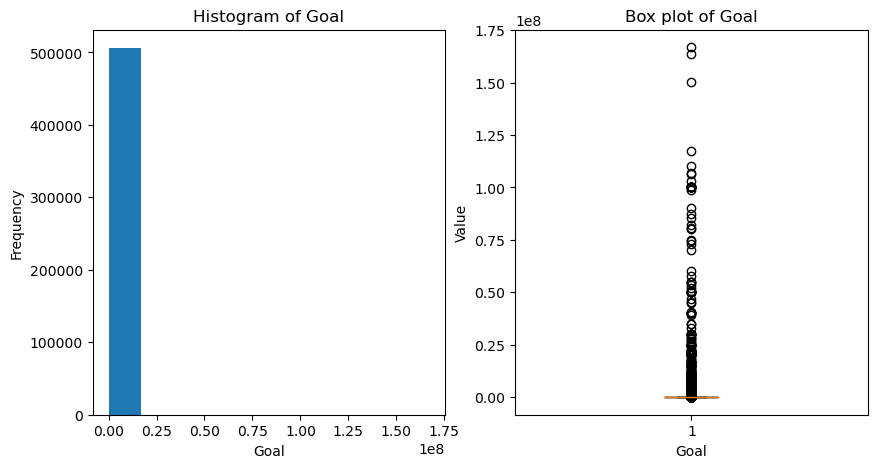

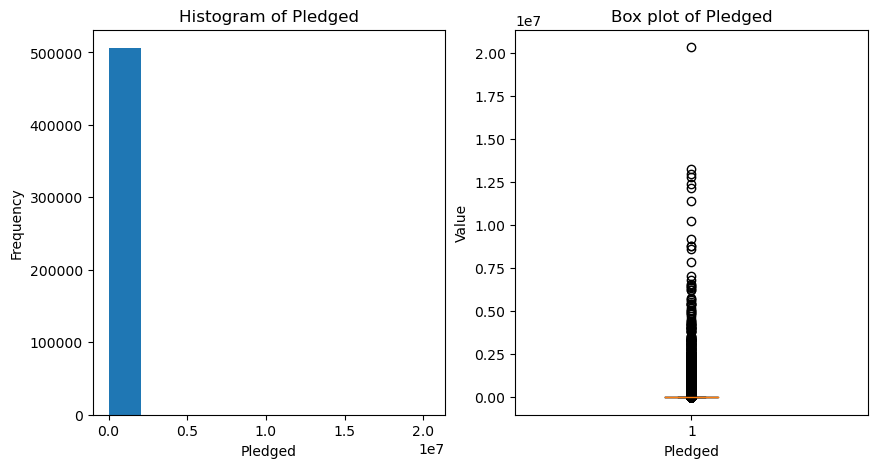

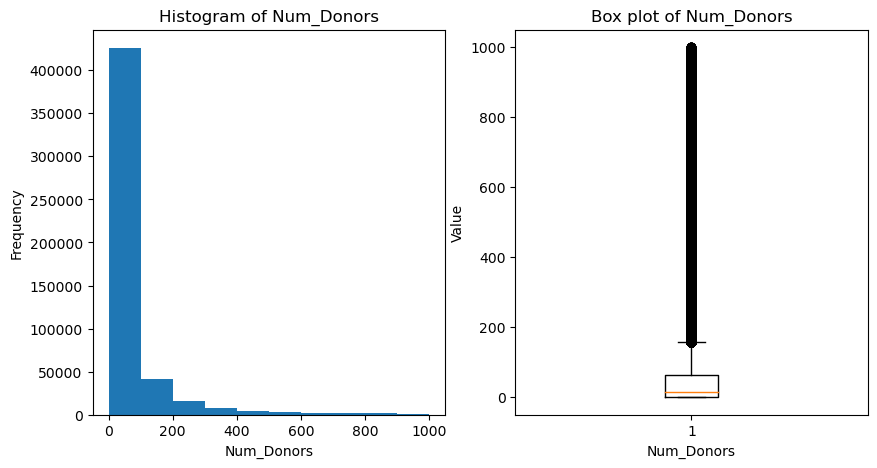

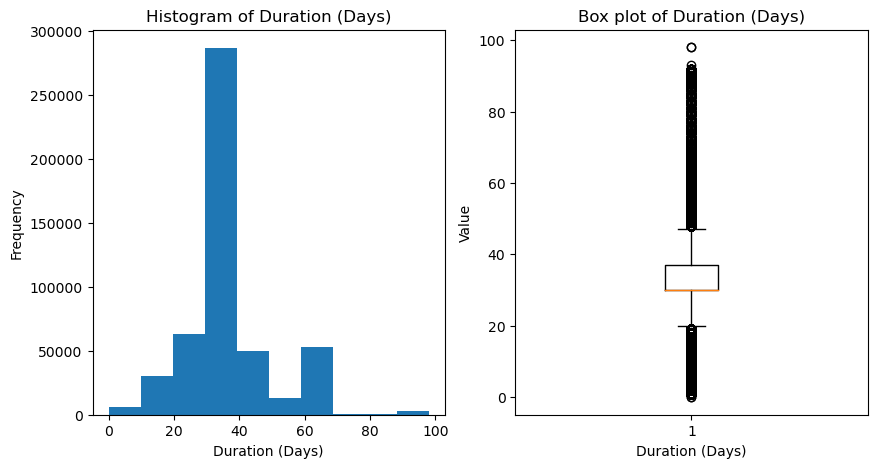

In [39]:
#plot histogram and boxplot for each numeric feature
numeric_features = data.select_dtypes(include='number')
for feature in numeric_features:
    plot_feature(data, feature)

Three of the four numerical features are continous, but the num of donors is discrete and each will require its own manipulation. 

## Categorical Exploration

From the [Kickstarter website](https://help.kickstarter.com/hc/en-us/articles/115005127954-Can-I-choose-my-project-s-display-currency-#:~:text=Kickstarter%20does%20offer%20backers%20the%20option%20to%20set,currency%2C%20not%20in%20a%20backer%E2%80%99s%20preferred%20display%20currency.), the following is given
 > "It’s not possible to choose a preferred display currency for your project. By default, the currency your project will display and collect funds in is determined by the country of origin* you indicate when building your project. For example, if your banking and identity information are based in, say, Hong Kong, your project goal and reward costs will automatically be displayed in HKD. Once your project ends, the funds collected will be sent to you in HKD. If you’re in the UK, they’ll be in GBP, and so on. Kickstarter does offer backers the option to set a preferred display currency when browsing projects. However, pledges will always be collected in the project’s native currency, not in a backer’s preferred display currency. ***For projects launching from Denmark, Norway, Sweden, Switzerland, and Poland, creators now have the option to choose whether to run their project in their country’s native currency, or in Euros.***"


In [9]:
#im interested in the dataset as a whole and not so much from a time perspective

#get counts
def get_counts(dataframe, feature):
    counts = dataframe[feature].value_counts()
    return counts

#plot counts
def plot_counts(dataframe, feature, fig_size=tuple):
    values = get_counts(dataframe, feature).index
    counts = get_counts(dataframe, feature).values
    plt.figure(figsize=fig_size)
    plt.bar(x=values, height=counts)
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

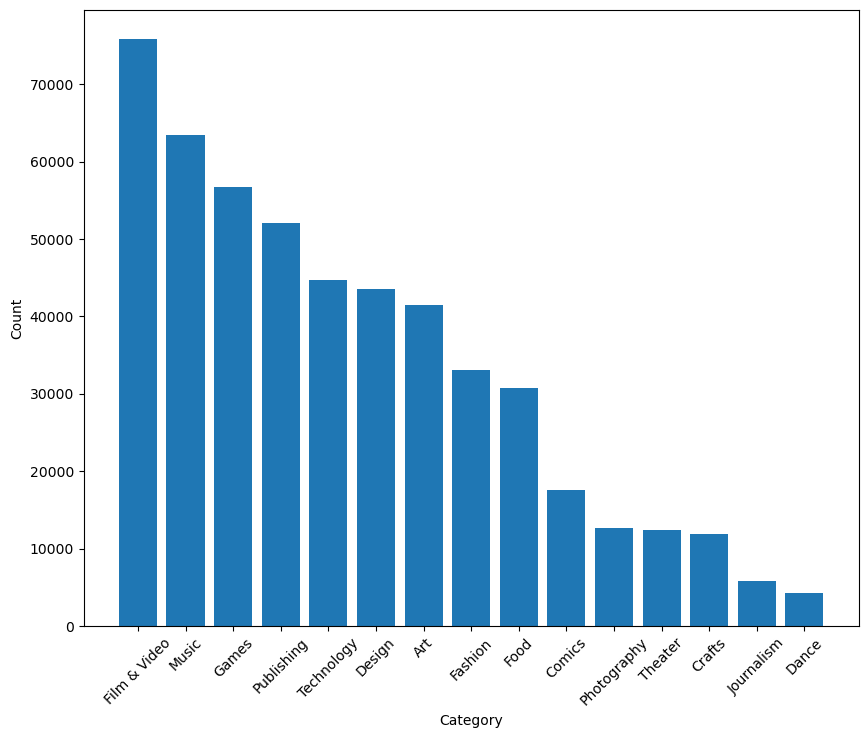

In [73]:
#plot_counts for Category
plot_counts(data, 'Category', (10, 8))

Omit Subcategory because too many unique values - 171

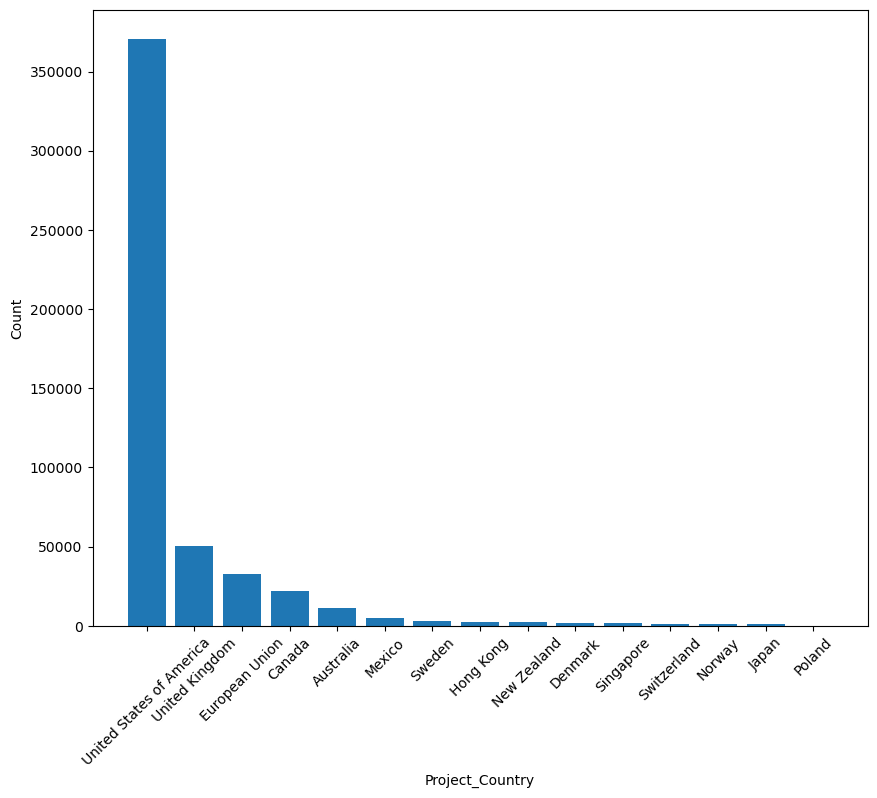

In [75]:
#let's look at Project Country
plot_counts(data, 'Project_Country', (10, 8))

In [83]:
#percentage composition of countries
country_counts = get_counts(data, 'Project_Country')
((country_counts / len(data)) * 100).round()

United States of America    73.0
United Kingdom              10.0
European Union               6.0
Canada                       4.0
Australia                    2.0
Mexico                       1.0
Sweden                       1.0
Hong Kong                    1.0
New Zealand                  0.0
Denmark                      0.0
Singapore                    0.0
Switzerland                  0.0
Norway                       0.0
Japan                        0.0
Poland                       0.0
Name: Project_Country, dtype: float64

The USA accounts for 73% of the data, makes sense though considering Kickstarter is an american company.

From above, we know that EU countries can choose Euros or their domestic currency, but given the breakdown it is better to consolidate the EU countries into the EU

In [8]:
#set dictionaries to replace values - Eurpope should change to European Union
euro_dict = {'Sweden': 'European Union', 'Denmark': 'European Union', 'Switzerland': 'European Union', 'Norway': 'European Union', 'Poland': 'European Union'}

#replace European countries with Europe and Euro, lose some granularity, but will be better
data['Project_Country'].replace(euro_dict, inplace=True)


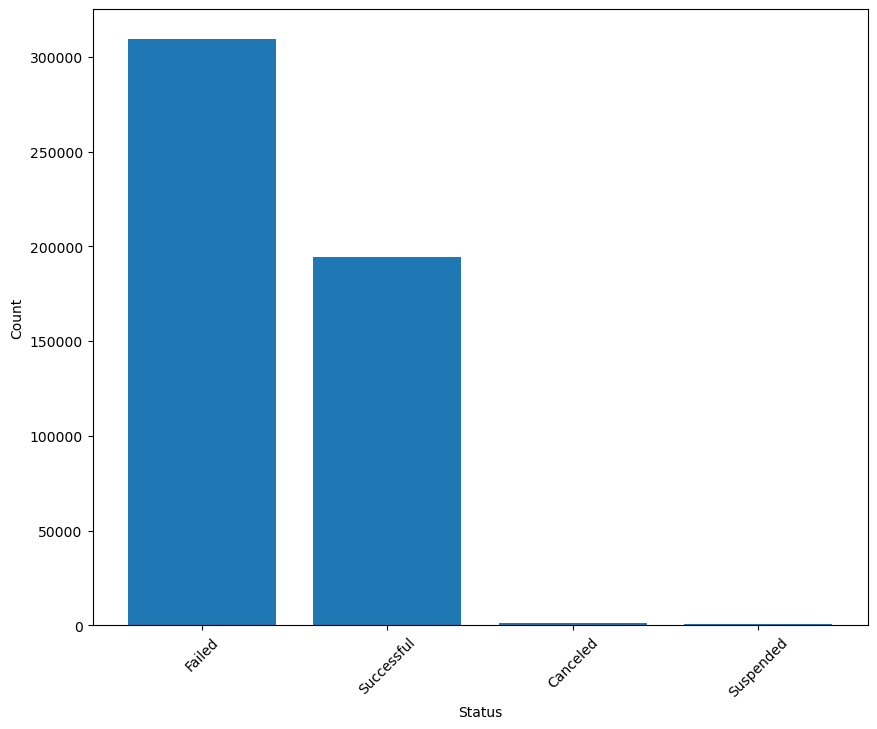

In [85]:
#explore status
plot_counts(data, 'Status', (10, 8))

Most are either Failed or Successful and in this context, Cancelled and Suspended can be considered Failed

In [9]:
#re categorize status

status_dict = {'Canceled': 'Failed', 'Suspended': 'Failed'}

data['Status'] = data['Status'].replace(status_dict)

# Binning Exploration - for later use if necessary

### Determining optimal number of bins if any

In [34]:
#get optimal number of bins using Freedman - Diaconis

def optimal_num_bins(dataframe, feature):
    IQR = dataframe[feature].quantile(0.75) - dataframe[feature].quantile(0.25) 
    bin_width = (2 * IQR) / (len(dataframe[feature]) ** (1/3))
    min_value = min(dataframe[feature])
    max_value = max(dataframe[feature])
    num_bins = int((max_value - min_value) / bin_width)
    return num_bins


In [35]:
#num bins for Goal
optimal_num_bins(data, 'Goal')

511523

In [36]:
#num bins for Pledged
optimal_num_bins(data, 'Pledged')

181517

In [37]:
#number of bins for Donors
optimal_num_bins(data, 'Num_Donors')

642

In [38]:
#num bins for duration
optimal_num_bins(data, 'Duration (Days)')

557

No luck, the optimal number of bins all seem excessive

Bin based on Range

In [13]:
#get range of each numeric feature
numeric_features = ['Goal', 'Pledged', 'Num_Donors', 'Duration (Days)']

def calc_range(dataframe, feature):
    my_range = max(dataframe[feature]) - min(dataframe[feature])
    return my_range

for feature in numeric_features:
    my_range = calc_range(data, feature)
    print(f"{feature}: {my_range}")

Goal: 166877652
Pledged: 20338986
Num_Donors: 999
Duration (Days): 98


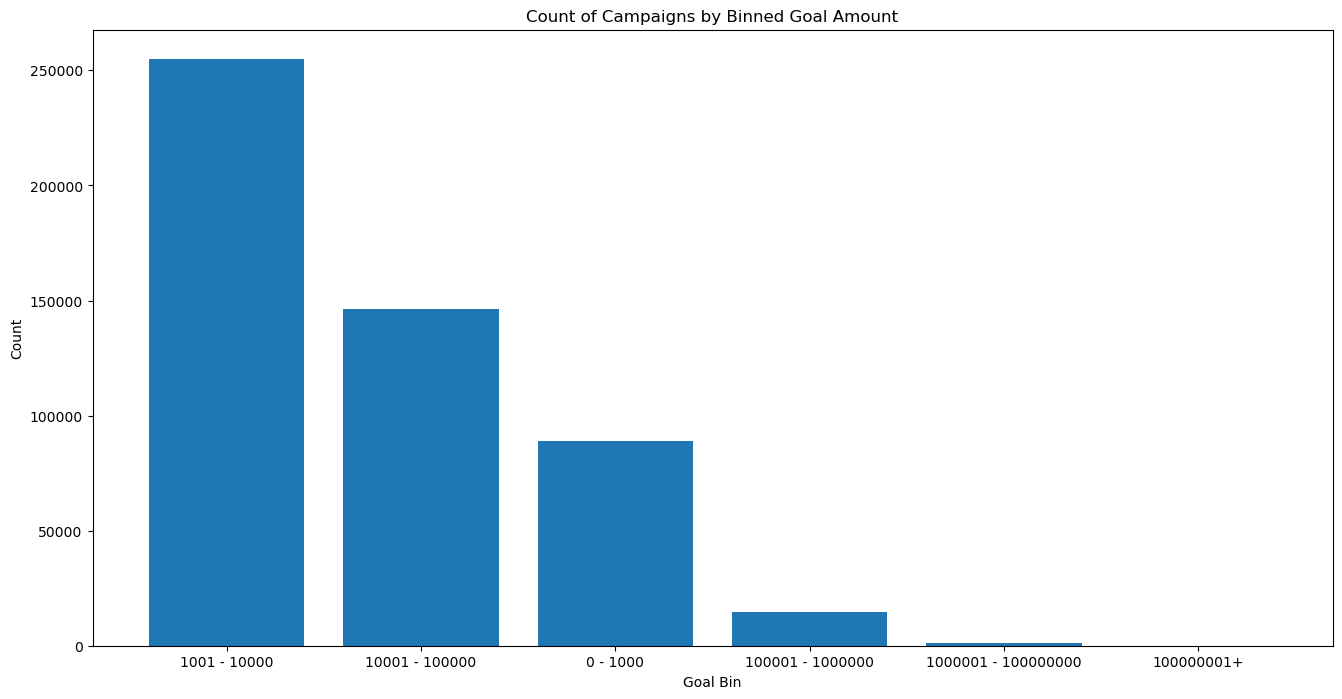

In [30]:
#Goal
#decalre bins and labels
goal_bins = [0, 1001, 10001, 100001, 1000001, 100000001, 200000000]
goal_labels = ['0 - 1000', '1001 - 10000', '10001 - 100000', '100001 - 1000000', '1000001 - 100000000', '100000001+']

binned_goal = pd.cut(data['Goal'], bins=goal_bins, right=False, labels=goal_labels)
goal_binned = pd.DataFrame(binned_goal.value_counts())
goal_binned.reset_index(inplace=True)
goal_binned.rename(columns={'index': 'Goal', 'Goal': 'Count'}, inplace=True)


#plt counts
fig = plt.figure(figsize=(16, 8))
plt.bar(x=goal_binned['Goal'], height=goal_binned['Count'])
plt.title('Count of Campaigns by Binned Goal Amount')
plt.xlabel('Goal Bin')
plt.ylabel('Count')
plt.show()

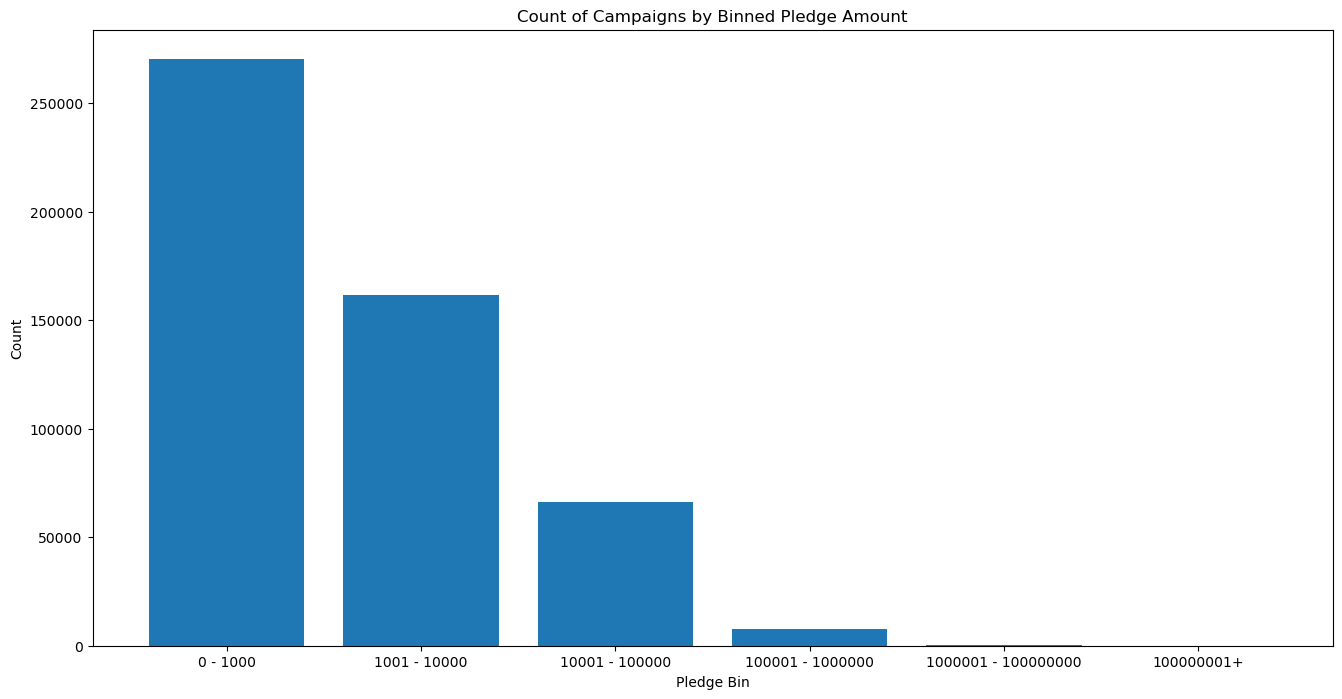

In [28]:
#Pledge
#decalre bins and labels -  same as Goal for consistency
pledge_bins = [0, 1001, 10001, 100001, 1000001, 100000001, 200000000]
pledge_labels = ['0 - 1000', '1001 - 10000', '10001 - 100000', '100001 - 1000000', '1000001 - 100000000', '100000001+']

binned_pledge = pd.cut(data['Pledged'], bins=pledge_bins, right=False, labels=pledge_labels)
pledge_binned = pd.DataFrame(binned_pledge.value_counts())
pledge_binned.reset_index(inplace=True)
pledge_binned.rename(columns={'index': 'Pledged', 'Pledged': 'Count'}, inplace=True)


#plt counts
fig = plt.figure(figsize=(16, 8))
plt.bar(x=pledge_binned['Pledged'], height=pledge_binned['Count'])
plt.title('Count of Campaigns by Binned Pledge Amount')
plt.xlabel('Pledge Bin')
plt.ylabel('Count')
plt.show()

bins for number of backers
0 - 10
11 - 50
51 - 100
101 - 250
251 - 500
501 - 750
751 - 1000

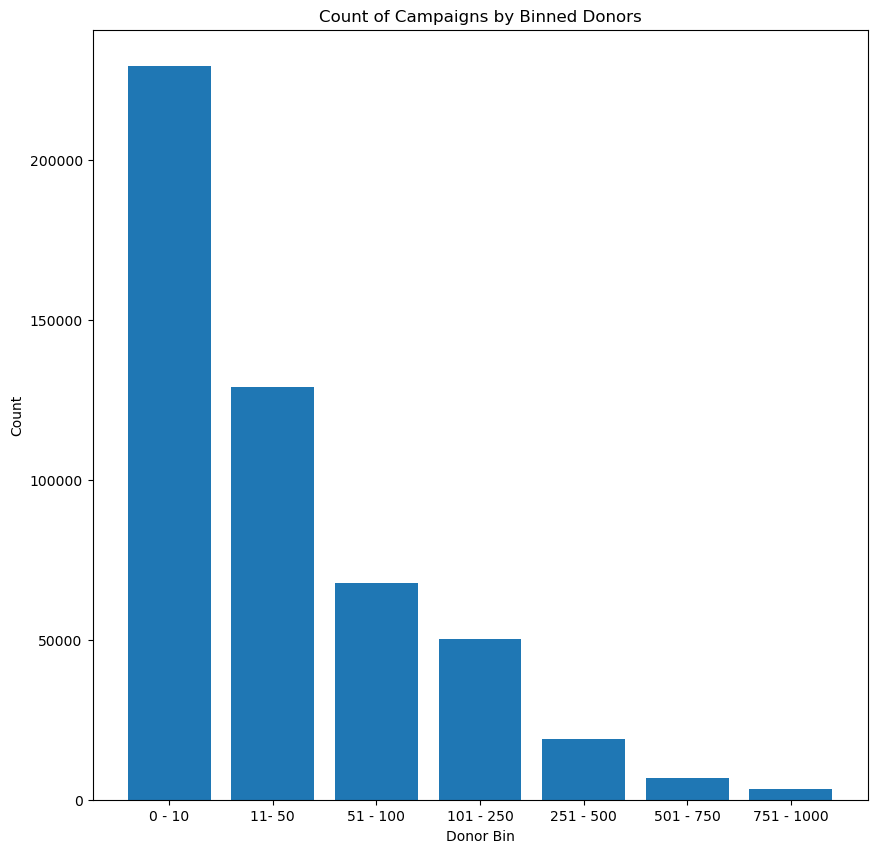

In [37]:
#Num donors
donor_values = data['Num_Donors'].value_counts().index
describe_df(data['Num_Donors'])

donor_bins = [0, 11, 51, 101, 251, 501, 751, 1001]
my_labels = ['0 - 10', '11- 50', '51 - 100', '101 - 250', '251 - 500', '501 - 750', '751 - 1000']

binned_data = pd.cut(data['Num_Donors'], bins=donor_bins, right=False, labels=my_labels)
binned_donors = pd.DataFrame(binned_data.value_counts())
binned_donors.reset_index(inplace=True)
binned_donors.rename(columns={'index': 'Num_Donors', 'Num_Donors': 'Count'}, inplace=True)

#plt counts
fig = plt.figure(figsize=(10, 10))
plt.bar(x=binned_donors['Num_Donors'], height=binned_donors['Count'])
plt.title('Count of Campaigns by Binned Donors')
plt.xlabel('Donor Bin')
plt.ylabel('Count')
plt.show()


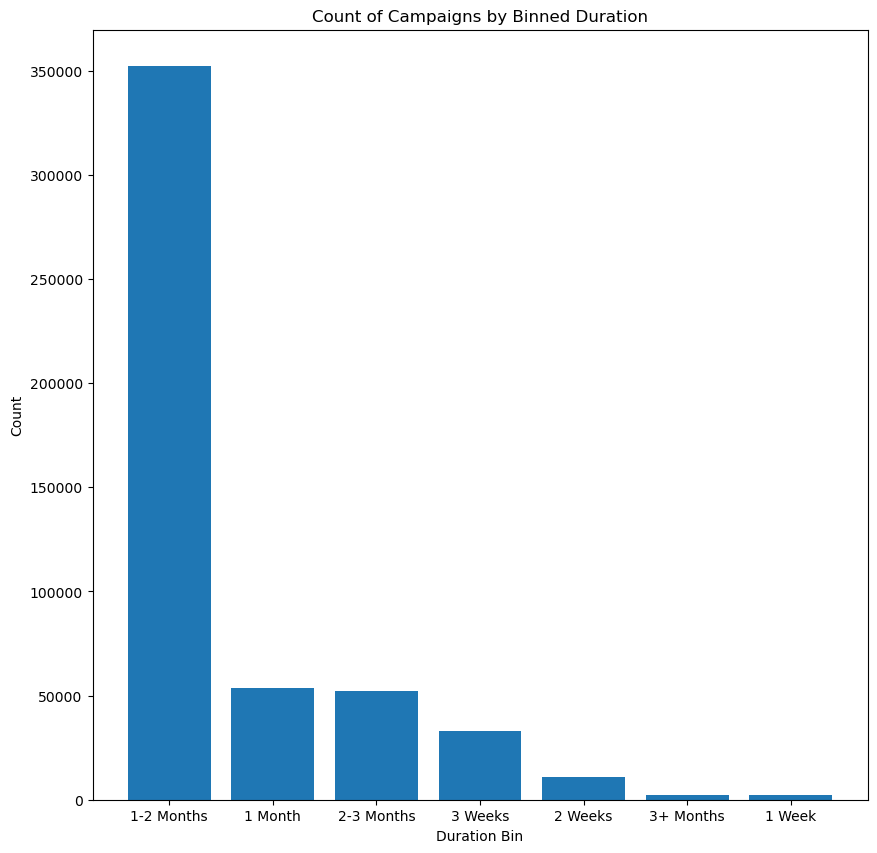

In [28]:
#duration
#get index values
my_values = data['Duration (Days)'].value_counts().index
my_values.sort_values()

#my bins and labels
my_bins = [0, 7, 14, 21, 30, 60, 90, 120]
my_labels = ['1 Week', '2 Weeks', '3 Weeks', '1 Month', '1-2 Months', '2-3 Months', '3+ Months' ]


binned_data = pd.cut(data['Duration (Days)'], bins=my_bins, right=False, labels=my_labels)

duration_binned = pd.DataFrame(binned_data.value_counts())
duration_binned.reset_index(inplace=True)
duration_binned.rename(columns={'index': 'Duration', 'Duration (Days)': 'Count'}, inplace=True)

#plot the counts
fig = plt.figure(figsize=(10, 10))
plt.bar(x=duration_binned['Duration'], height=duration_binned['Count'])
plt.title('Count of Campaigns by Binned Duration')
plt.xlabel('Duration Bin')
plt.ylabel('Count')
plt.show()




# preprocessing exploration

In [10]:
#function to take log
def log_transform(dataframe):
    log_value = np.log1p(dataframe)
    round_log = log_value.round(0)
    return round_log


def square_root(dataframe):
    my_root = np.sqrt(dataframe).round(2)
    return my_root

from sklearn.preprocessing import PowerTransformer, QuantileTransformer #import for function

#function to apply Yeo-Johnson
def yeo_johnson(dataframe):
    pt = PowerTransformer(method='yeo-johnson')
    yj_data = pt.fit_transform(dataframe.values.reshape(-1, 1))
    return yj_data



#make copies of df
def make_copies(dataframe, feature, num_copies):
    new_df = pd.concat([dataframe[feature]] * num_copies, axis=1)
    new_df.columns = ['Orginal', 'Test1', 'Test2', 'Test3']
    return new_df

#plot boxplots for exploring outlier methods
def plot_boxplot(dataframe, title):
    fig, axs = plt.subplots(1, len(dataframe.columns), figsize=(20, 5))
    for i, col in enumerate(dataframe.columns):
        axs[i].boxplot(dataframe[col])
        axs[i].set_title(col)
    plt.suptitle(title)
    plt.show()


#plot histograms for exploring outlier methods
def plot_histogram(dataframe, title):
    fig, axs = plt.subplots(1, len(dataframe.columns), figsize=(20, 5))
    for i, col in enumerate(dataframe.columns):
        axs[i].hist(dataframe[col])
        axs[i].set_title(col)
    plt.suptitle(title)
    plt.show()

In [13]:
#make copies for numerical features
goal = make_copies(data, 'Goal', 4)
pledge = make_copies(data, 'Pledged', 4)
donors = make_copies(data, 'Num_Donors', 4)
duration = make_copies(data, 'Duration (Days)', 4)

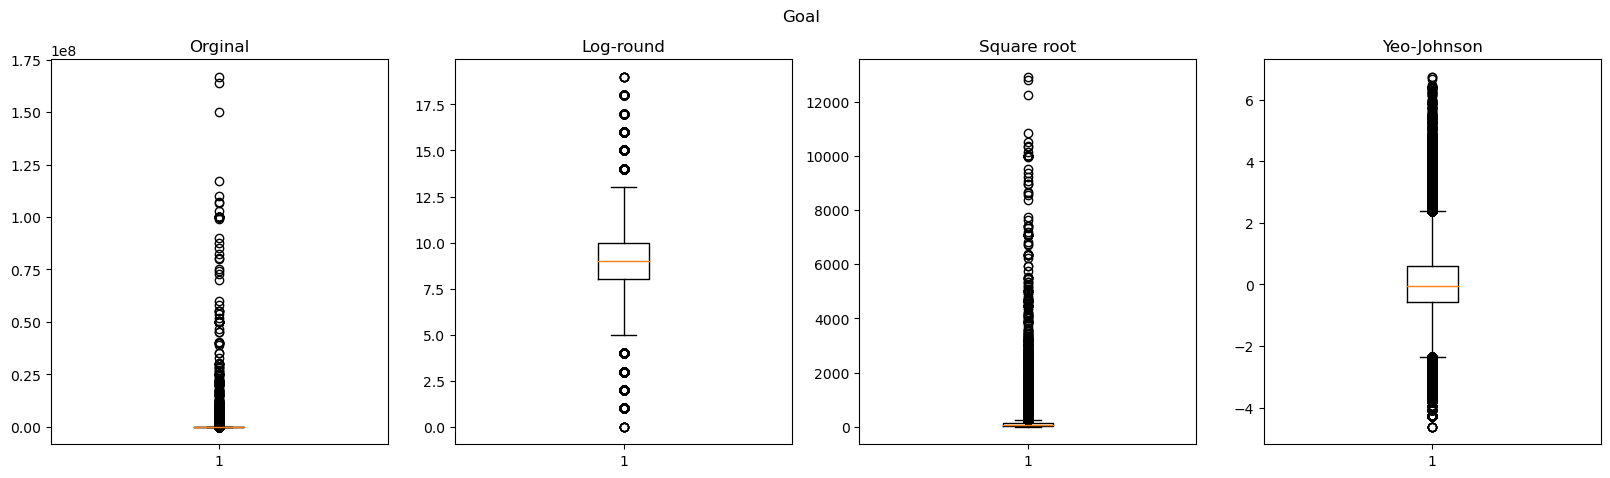

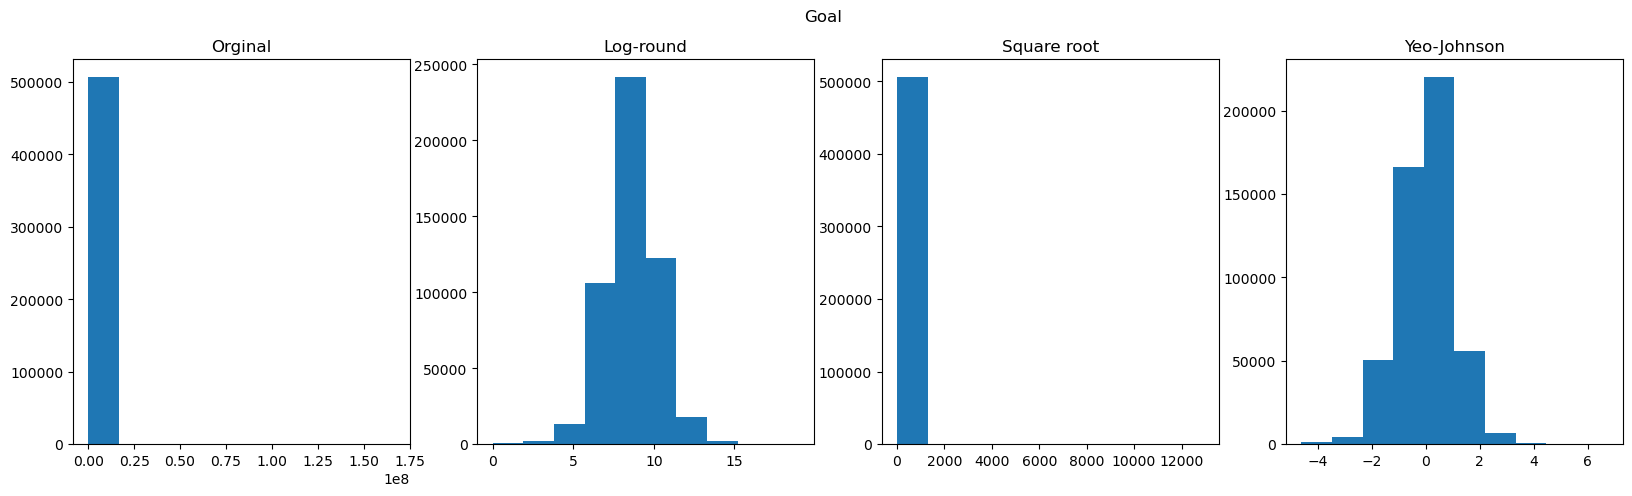

In [14]:
#Working on goal - 
goal['Test1'] = log_transform(goal['Test1']) #round log values
goal['Test2'] = square_root(goal['Test2']) #
goal['Test3'] = yeo_johnson(goal['Test3'])

goal.rename(columns={'Test1': 'Log-round', 'Test2': 'Square root', 'Test3': 'Yeo-Johnson'}, inplace=True)


plot_boxplot(goal, 'Goal')
plot_histogram(goal, 'Goal')


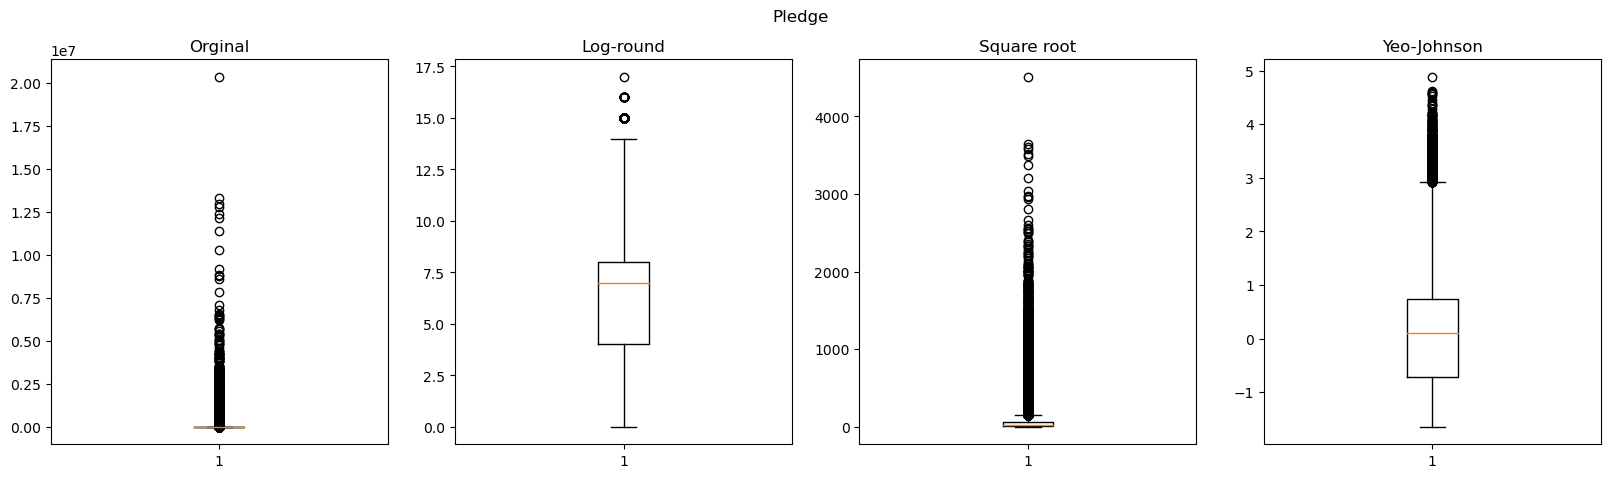

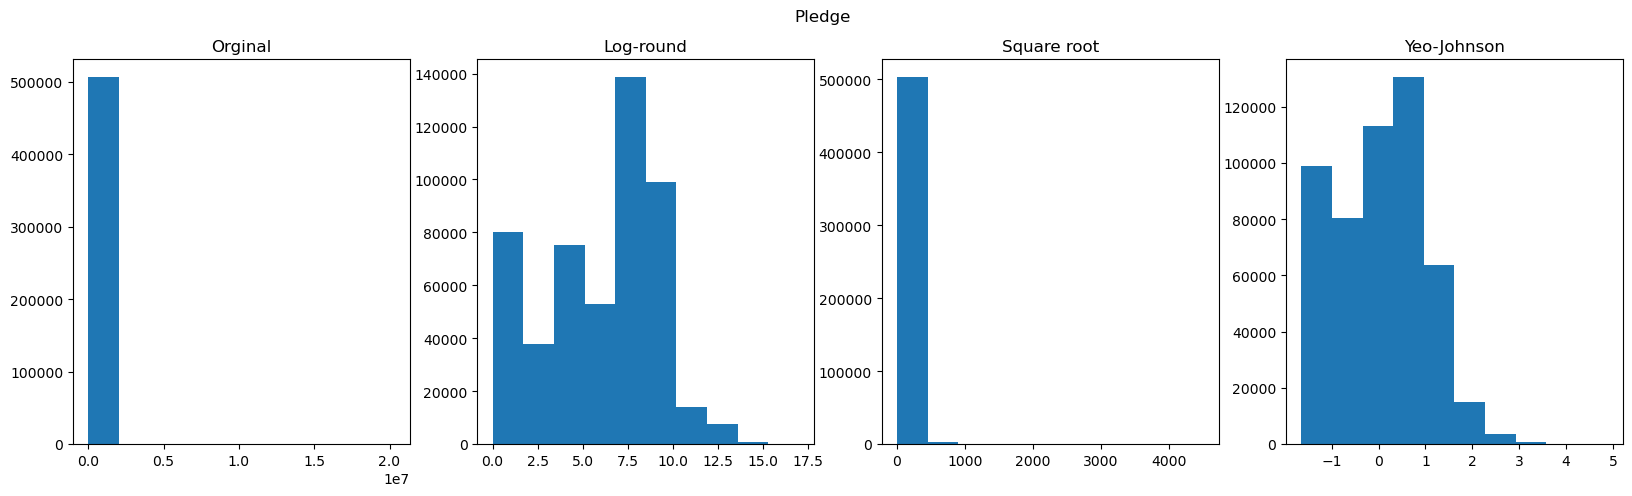

In [15]:
#Working on pledge
pledge['Test1'] = log_transform(pledge['Test1']) #round log values
pledge['Test2'] = square_root(pledge['Test2']) #don't round log vlaues
pledge['Test3'] = yeo_johnson(pledge['Test3'])

pledge.rename(columns={'Test1': 'Log-round', 'Test2': 'Square root', 'Test3': 'Yeo-Johnson'}, inplace=True)


plot_boxplot(pledge, 'Pledge')
plot_histogram(pledge, 'Pledge')


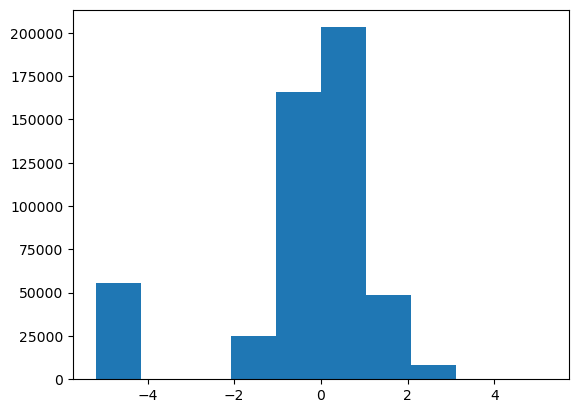

In [21]:
#check quantile transformer of log-round for pledge
qt = QuantileTransformer(output_distribution='normal')

qt_transformed = qt.fit_transform(pledge['Log-round'].values.reshape(-1, 1))


plt.hist(qt_transformed)
plt.show()

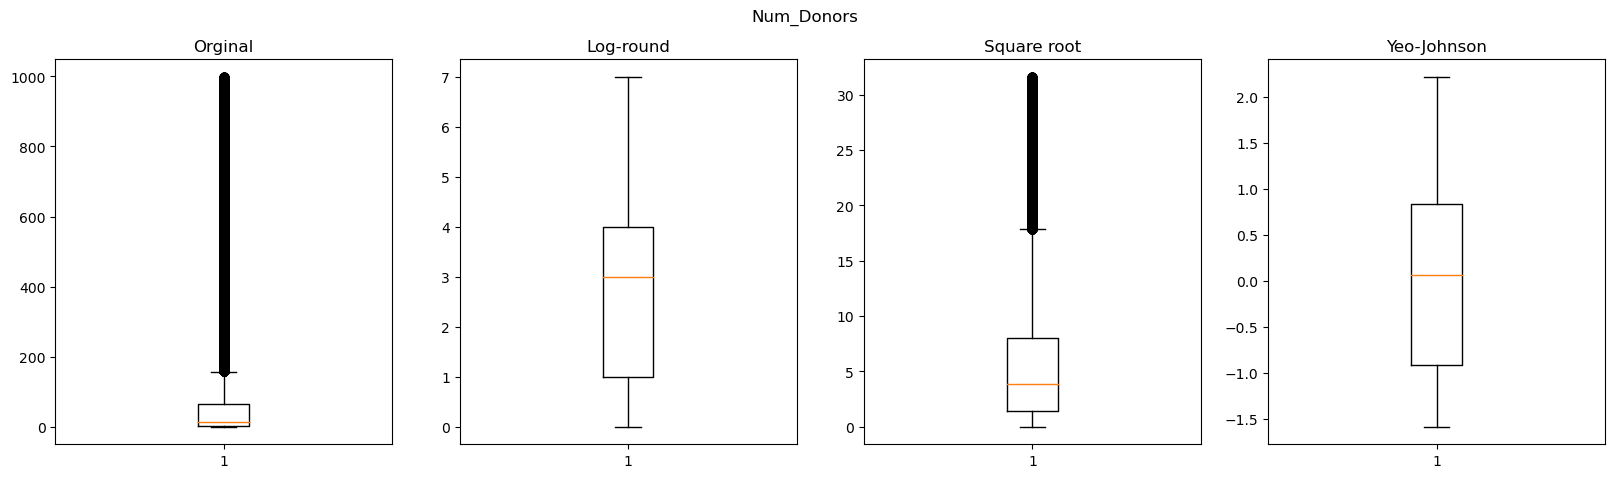

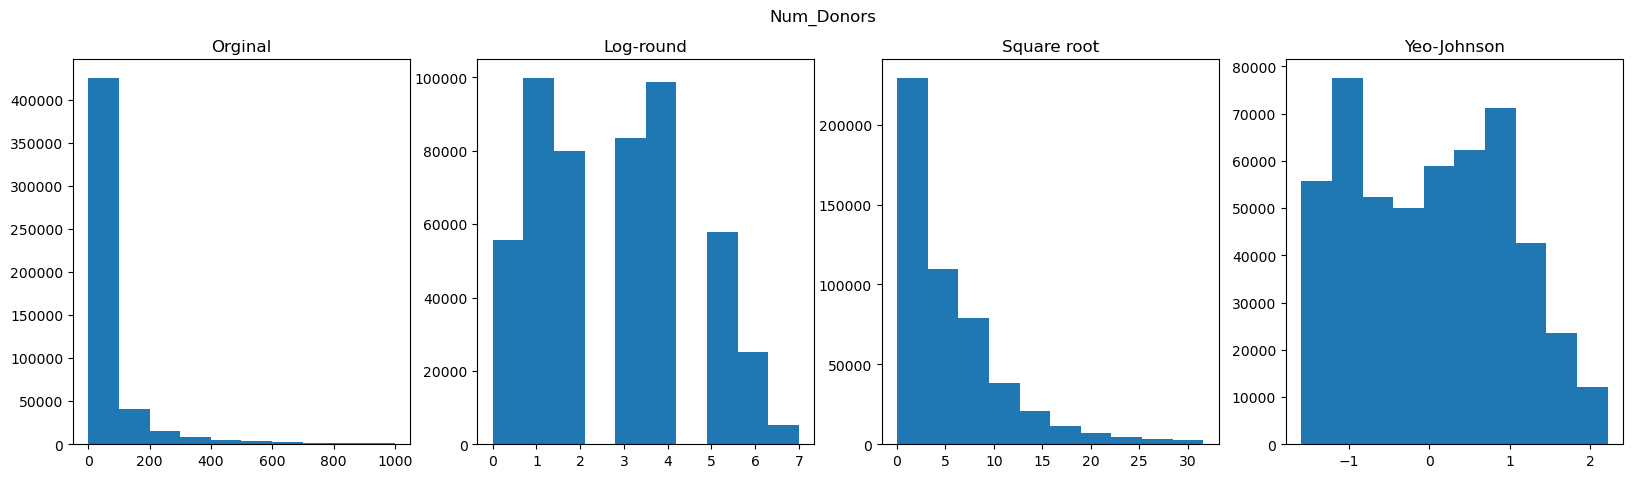

In [16]:
#Working on Donors
donors['Test1'] = log_transform(donors['Test1']) #round log values
donors['Test2'] = square_root(donors['Test2']) 
donors['Test3'] = yeo_johnson(donors['Test3'])

donors.rename(columns={'Test1': 'Log-round', 'Test2': 'Square root', 'Test3': 'Yeo-Johnson'}, inplace=True)


plot_boxplot(donors, 'Num_Donors')
plot_histogram(donors, 'Num_Donors')


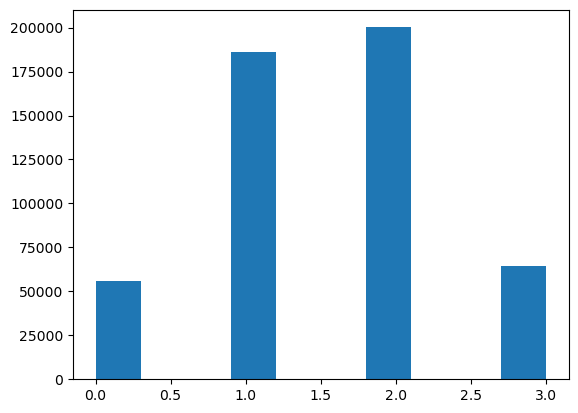

In [17]:
#maybe consider log on square root
plt.hist(log_transform(donors['Square root']))
plt.show()

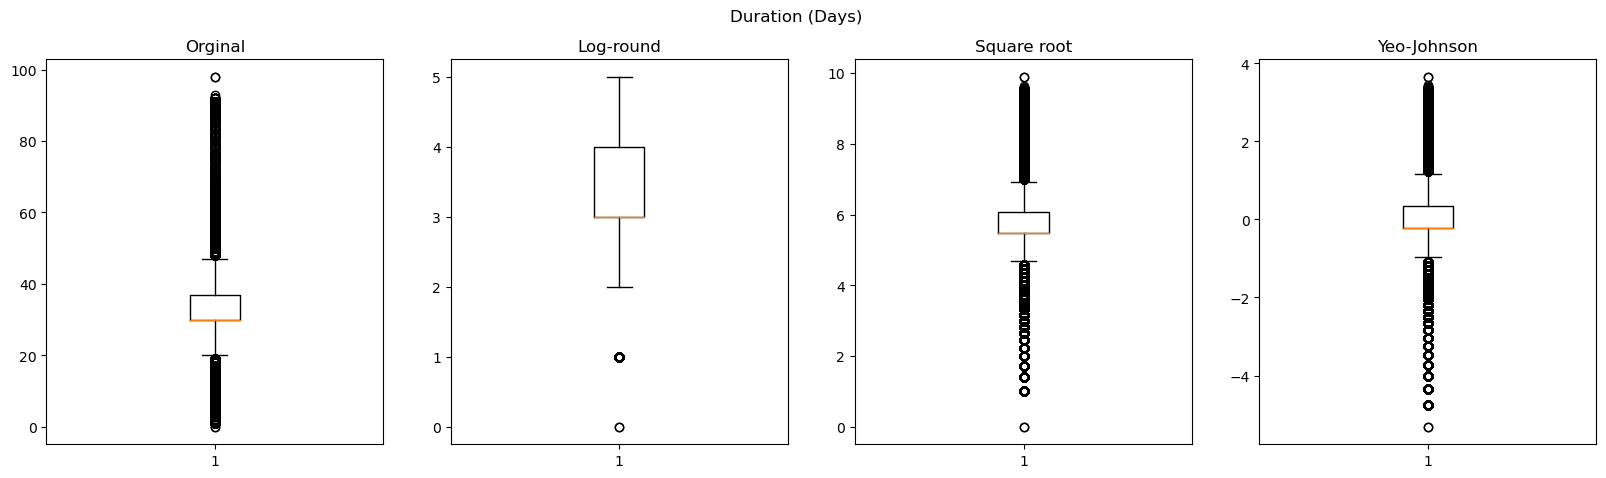

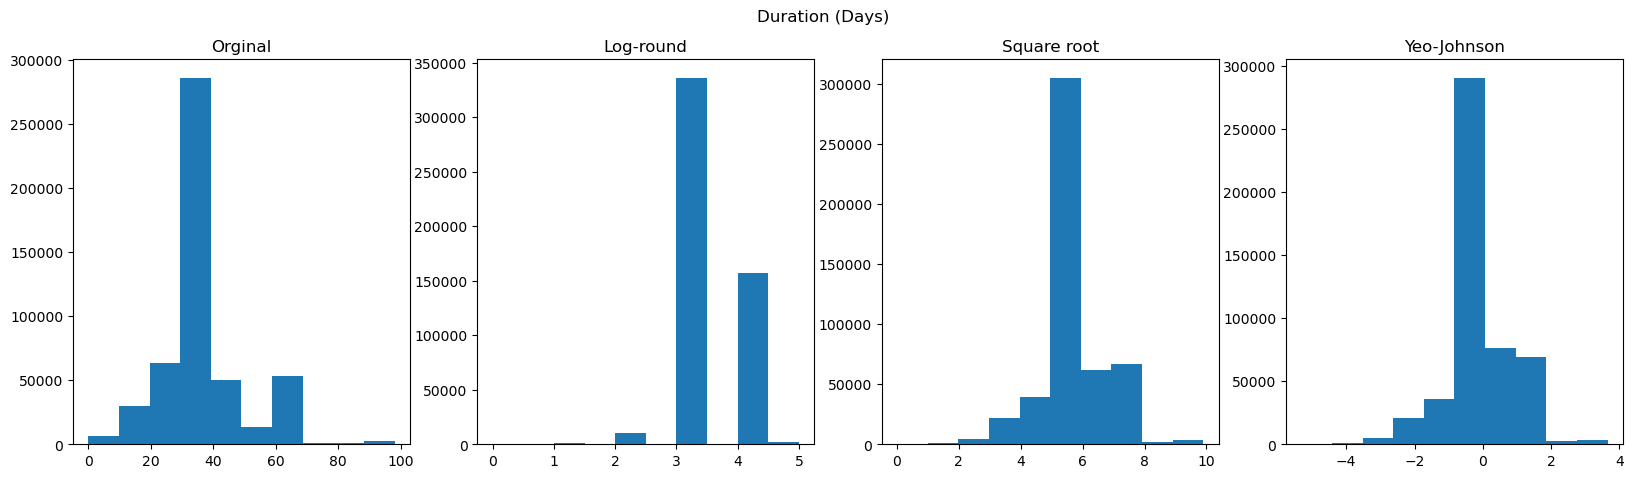

In [50]:
#Working on duration
duration['Test1'] = log_transform(duration['Test1']) #round log values
duration['Test2'] = square_root(duration['Test2'])
duration['Test3'] = yeo_johnson(duration['Test3'])

duration.rename(columns={'Test1': 'Log-round', 'Test2': 'Square root', 'Test3': 'Yeo-Johnson'}, inplace=True)


plot_boxplot(duration, 'Duration (Days)')
plot_histogram(duration, 'Duration (Days)')


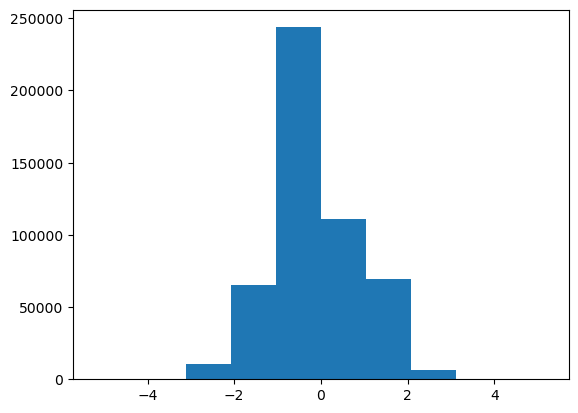

In [39]:
#check quantile transformer on original
original_qt = qt.fit_transform(duration['Orginal'].values.reshape(-1, 1))

plt.hist(original_qt)
plt.show()

## Relationships

without transformations

In [11]:
#make copy for changes
copy_data = data.copy()

copy_data.drop(['Launch_Date', 'End_Date'], axis=1, inplace=True)

In [31]:
copy_data.columns

Index(['Campaign_ID', 'Goal', 'Pledged', 'Num_Donors', 'Status', 'Category',
       'Subcategory', 'Project_Country', 'Duration (Days)'],
      dtype='object')

In [13]:
#declare categorical columns
cat_columns = ['Category', 'Subcategory', 'Project_Country', 'Status']

#create new factorized columns
copy_data[cat_columns] = copy_data[cat_columns].apply(lambda x: pd.factorize(x)[0])

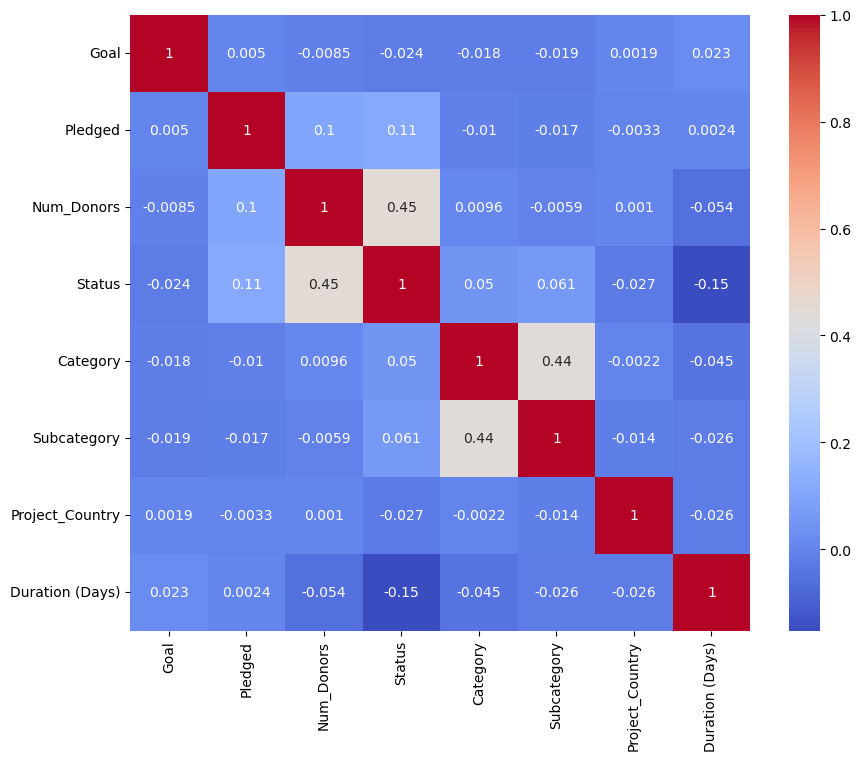

In [38]:
#make a heatmap
make_heatmap(copy_data, (10, 8))

So, prior to any transformations, the target (Status) is correlatted with the following:
- Pledged 0.11
- Num_Donors 0.45
- Duration (Days) -0.15

let's transform some of the numerical data and reassess the heatmap
- Log for Goal
- log and quantile transformer for pledged
- aquare root and log for Num_donors
- quantile transformer Duration


/home/sbangarh/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


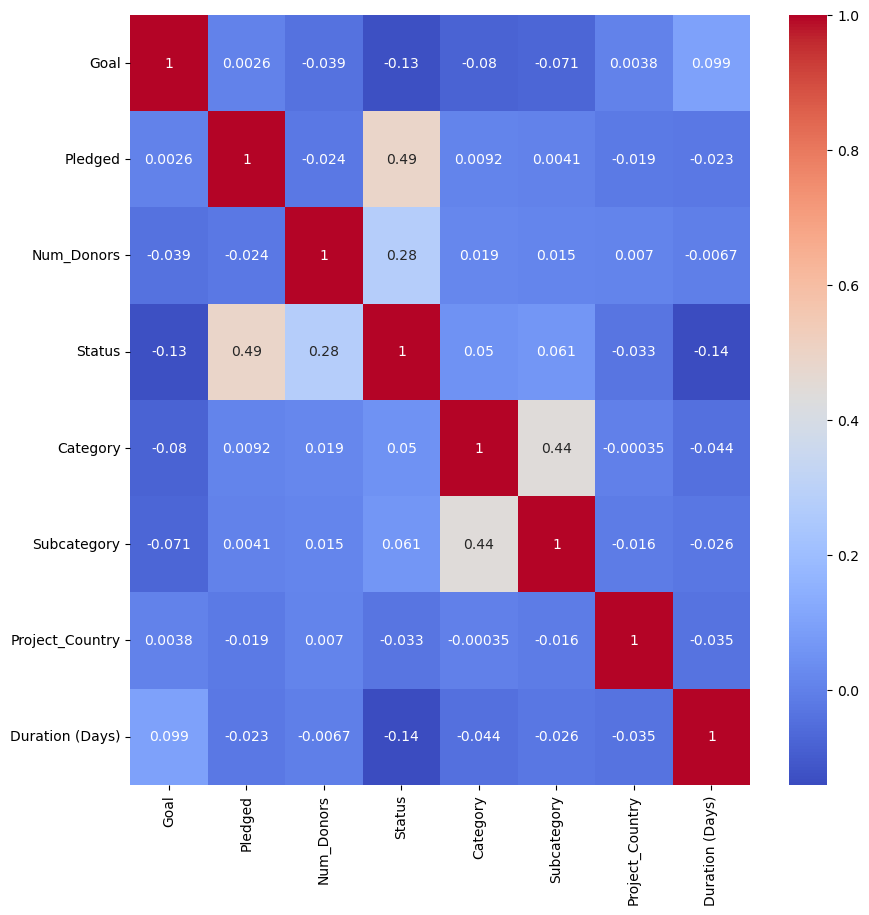

In [14]:
#initialize Quantile Transformer
qt = QuantileTransformer(output_distribution='normal')


#perform transformers
copy_data['Goal'] = log_transform(copy_data['Goal']) # log tansform for Goal
copy_data['Pledged'] = log_transform(copy_data['Pledged']) #log transform pledge first
copy_data['Pledged'] = qt.fit_transform(copy_data['Pledged'].values.reshape(-1, 1)) #quantile transformer of log transformed pledge
copy_data['Num_Donors'] = square_root(log_transform(copy_data['Num_Donors'])) #log transform
copy_data['Duration (Days)'] = qt.fit_transform(copy_data['Duration (Days)'].values.reshape(-1, 1)) #qunatile transfomer

#make heatmap
make_heatmap(copy_data, (10, 10))

With some Transformations, new correlation with the target (Status):
- Goal -0.13
- Pledged 0.49
- Num donors 0.28
- Duration -0.14

Log for Goal
log and quantile transformer for pledged

In [15]:
#make another copy for data
new_copy = data.copy()

In [16]:
#initialize Quantile Transformer
qt = QuantileTransformer(output_distribution='normal')

#goal and pledged transformed and num donors and duration binned
new_copy['Goal'] = log_transform(new_copy['Goal'])
new_copy['Pledged'] = log_transform(new_copy['Pledged']).values.reshape(-1, 1) #log transform pledge
new_copy['Pledged'] = qt.fit_transform(new_copy['Pledged'].values.reshape(-1, 1)) #quantile transformer pledge


#binning Num Donors
donor_bins = [0, 11, 51, 101, 251, 501, 751, 1001]
donor_labels = ['0 - 10', '11- 50', '51 - 100', '101 - 250', '251 - 500', '501 - 750', '751 - 1000']

new_copy['Num_Donors'] = pd.cut(data['Num_Donors'], bins=donor_bins, right=False, labels=donor_labels)


#binning Durations
duration_bins = [0, 7, 14, 21, 30, 60, 90, 120]
duration_labels = ['1 Week', '2 Weeks', '3 Weeks', '1 Month', '1-2 Months', '2-3 Months', '3+ Months' ]

new_copy['Duration (Days)'] = pd.cut(data['Duration (Days)'], bins=duration_bins, right=False, labels=duration_labels)




In [17]:
#factorize and heatmap


#declare categorical columns
cat_columns = ['Category', 'Subcategory', 'Project_Country', 'Status', 'Num_Donors', 'Duration (Days)']

#create new factorized columns
new_copy[cat_columns] = new_copy[cat_columns].apply(lambda x: pd.factorize(x)[0])

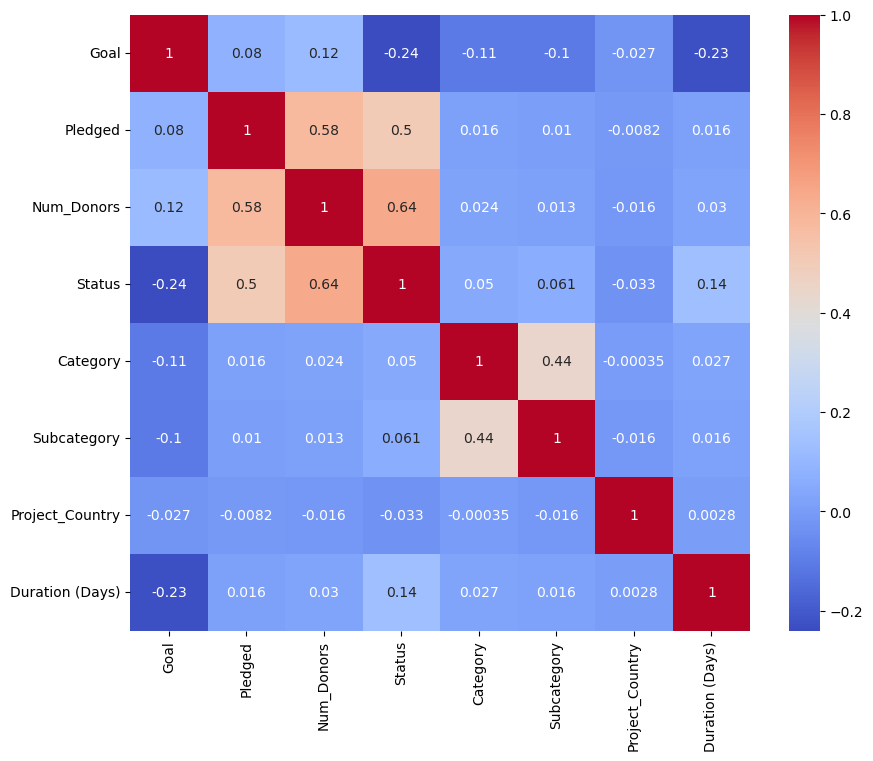

In [19]:
#make heatmap
make_heatmap(new_copy, (10, 8))

Correlation with Status:
- Goal -0.24
- Pledged 0.5
- Num_donors 0.64
- Duration 0.14

Inputs now start to correlate with one another
- Goal and Duration -0.24
- Goal and donors 0.12
- Pledge and Donors 0.58
- 

In [41]:
#create new copy
binned_copy = data.copy()

#drop date columns
binned_copy.drop(['Campaign_ID','Launch_Date', 'End_Date'], axis=1, inplace=True)

Index(['Campaign_ID', 'Launch_Date', 'End_Date', 'Goal', 'Pledged',
       'Num_Donors', 'Status', 'Category', 'Subcategory', 'Project_Country',
       'Duration (Days)'],
      dtype='object')

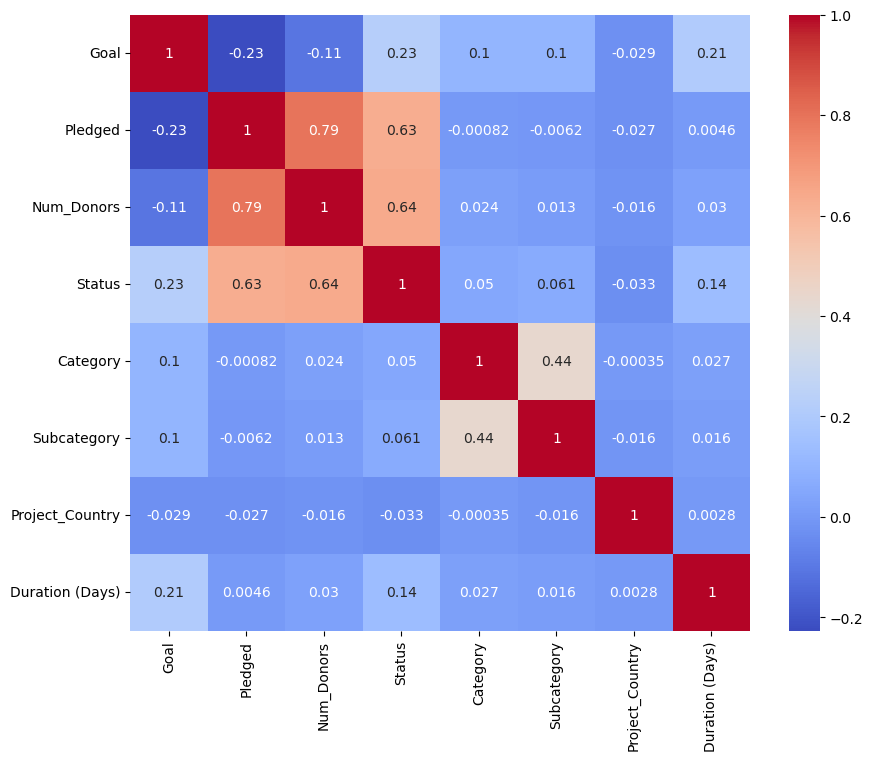

In [42]:
#bin goal, pledge, donors, duration


#define respective bins

#goal and pledge
goal_pledge_bins = [0, 1001, 10001, 100001, 1000001, 100000001, 200000000]
goal_pledge_labels = ['0 - 1000', '1001 - 10000', '10001 - 100000', '100001 - 1000000', '1000001 - 100000000', '100000001+']

#binning Num Donors
donor_bins = [0, 11, 51, 101, 251, 501, 751, 1001]
donor_labels = ['0 - 10', '11- 50', '51 - 100', '101 - 250', '251 - 500', '501 - 750', '751 - 1000']


#binning Durations
duration_bins = [0, 7, 14, 21, 30, 60, 90, 120]
duration_labels = ['1 Week', '2 Weeks', '3 Weeks', '1 Month', '1-2 Months', '2-3 Months', '3+ Months' ]


#function to bin data
def bin_data(dataframe, your_bins, your_labels):
    binned_data = pd.cut(dataframe, bins=your_bins, right=False, labels=your_labels)
    return binned_data

#call function

binned_copy['Goal'] = bin_data(binned_copy['Goal'], goal_pledge_bins, goal_pledge_labels)
binned_copy['Pledged'] = bin_data(binned_copy['Pledged'], goal_pledge_bins, goal_pledge_labels)
binned_copy['Num_Donors'] = bin_data(binned_copy['Num_Donors'], donor_bins, donor_labels)
binned_copy['Duration (Days)'] = bin_data(binned_copy['Duration (Days)'], duration_bins, duration_labels)


#factorize
binned_copy = binned_copy.apply(lambda x: pd.factorize(x)[0])

#heatmap
make_heatmap(binned_copy, (10, 8))


Binned the numerical data and factorized.

Correlation with Status:
- Goal 0.23
- Pledged 0.63
- Donors 0.64
- Duration 0.14

Input correlations
- Goal and Pledged -0.23,
- Goal and Donors -0.11,
- Goal and Category/Subcategory 0.1
- Goal and Duration 0.21
- Pledged and donors 0.79
- Category and Subcategory 0.44